In [2]:
import pandas as pd
dataset = pd.read_csv("dataset.csv").set_index("Unnamed: 0")

In [3]:
dataset.head()

,Utterance,Dialog_Act,cleaned_utterance
Unnamed: 0,,,
0,Okay. /,o,okay
1,"{D So, }",qw,d so
2,"[ [ I guess, +",qy^d,i guess
3,Does it say something? /,qy,does it say something
4,I think it usually does. /,sd,i think it usually does


In [4]:
dataset["Dialog_Act"].count()

190909

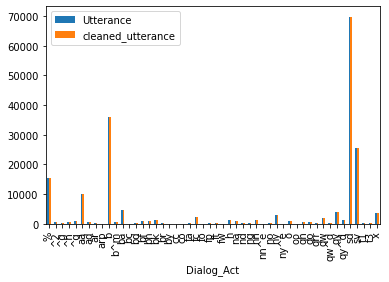

In [5]:
plot = dataset.groupby("Dialog_Act").count().plot.bar()

In [6]:
plot.get_figure().savefig("utterance_cleaned.png",dpi=300,pad_inches=0,bbox_inches='tight')

In [7]:
import regex as re
cleaned_utterance = []
# count = 0
for _,v in dataset.iterrows():
    cleaned = v["Utterance"].lower()
    cleaned = re.sub('[^a-zA-Z]', ' ', cleaned)
    cleaned = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", cleaned)
    cleaned = re.sub("(\\d|\\W)+", " ", cleaned)
#     print(v["Utterance"] , "------->", cleaned)
    cleaned_utterance.append(cleaned)
dataset["cleaned_utterance"] = cleaned_utterance
dataset.to_csv("dataset.csv")

KeyboardInterrupt: 

In [2]:
import pandas as pd
dataset = pd.read_csv("dataset.csv").set_index("Unnamed: 0")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
bags_of_words = CountVectorizer().fit_transform(dataset["cleaned_utterance"])
tfidf = TfidfVectorizer().fit_transform(dataset["cleaned_utterance"])

In [4]:
X_train_BOW, X_test_BOW, y_train_BOW, y_test_BOW = train_test_split(bags_of_words, dataset["Dialog_Act"], test_size = 0.2, random_state = 42, shuffle = True)

In [6]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf, dataset["Dialog_Act"], test_size = 0.2, random_state = 42, shuffle = True)

In [7]:
from sklearn import svm
svc_BOW = svm.SVC(verbose=True)
svc_tfidf = svm.SVC(verbose=True)

In [8]:
print(X_train_BOW.shape)

(152727, 18912)


In [9]:
svc_BOW.fit(X_train_BOW, y_train_BOW)

[LibSVM]

SVC(verbose=True)

In [11]:
predictions_BOW = svc_BOW.predict(X_test_BOW)

In [12]:
print(classification_report(y_test_BOW, predictions_BOW))
# print(X_train_BOW[100],y_train_BOW)

/home/rooney/venv-NLP/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           %       0.62      0.73      0.67      3037
          ^2       0.00      0.00      0.00       149
          ^g       0.00      0.00      0.00        17
          ^h       0.82      0.44      0.57       102
          ^q       0.00      0.00      0.00       202
          aa       0.53      0.30      0.39      1976
          ad       0.68      0.17      0.27       114
          ar       0.00      0.00      0.00        61
         arp       0.00      0.00      0.00         4
           b       0.75      0.94      0.84      7253
         b^m       0.00      0.00      0.00       115
          ba       0.79      0.65      0.71       900
          bc       0.00      0.00      0.00         3
          bd       0.91      0.50      0.65        20
          bf       0.00      0.00      0.00       179
          bh       0.52      0.59      0.56       229
          bk       0.67      0.23      0.34       248
          br       0.67    

In [16]:
svc_tfidf.fit(X_train_tfidf, y_train_tfidf)

[LibSVM]

SVC(verbose=True)

In [17]:
predictions_tfidf = svc_tfidf.predict(X_test_tfidf)

In [18]:
print(classification_report(y_test_tfidf, predictions_tfidf))

              precision    recall  f1-score   support

           %       0.67      0.70      0.69      3037
          ^2       0.00      0.00      0.00       149
          ^g       0.00      0.00      0.00        17
          ^h       0.76      0.44      0.56       102
          ^q       0.00      0.00      0.00       202
          aa       0.53      0.31      0.40      1976
          ad       0.70      0.20      0.31       114
          ar       0.00      0.00      0.00        61
         arp       0.00      0.00      0.00         4
           b       0.76      0.94      0.84      7253
         b^m       0.00      0.00      0.00       115
          ba       0.82      0.66      0.73       900
          bc       0.00      0.00      0.00         3
          bd       0.91      0.50      0.65        20
          bf       0.00      0.00      0.00       179
          bh       0.57      0.59      0.58       229
          bk       0.65      0.26      0.37       248
          br       0.69    

In [14]:
import joblib
# joblib.dump(clf, "model.pkl") 

In [15]:
joblib.dump(svc_BOW, "svc_BOW.pkl")

['svc_BOW.pkl']

In [19]:
joblib.dump(svc_tfidf, "svc_tfidf.pkl")

['svc_tfidf.pkl']